<a href="https://colab.research.google.com/github/kalanakt/ADM1/blob/main/ADM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model ADM1

*The process of anaerobic transformation of methane fermentation can be described as direct and indirect symbiotic relationships between different groups of microorganisms. In order to describe the mechanism of the reactions taking place, the Anaerobic Digestion Model No.1 (ADM1) can be used - a mathematical model designed to describe the methane fermentation process of sludge from oxygen wastewater treatment plants.*


In [1]:
# imports

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.integrate import odeint, solve_ivp

## Declaration of constants¶

*Constant values that are used in numerical calculations are declared below.*

In [4]:
global C_Saa
global C_Sac
global C_Sbu
global C_Sch4
global C_Sfa
global C_SI
global C_Spro
global C_Ssu
global C_Sva
global C_XB
global C_Xc
global C_Xch
global C_XI
global C_Xli
global C_Xpr

global fAC_AA
global fAC_SU
global fBU_AA
global fBU_SU
global fH2_AA
global fH2_SU
global fPRO_AA
global fPRO_SU
global fVa_AA

global fCH_XC
global fFA_Xli
global fLI_XC
global fPR_XC
global fSI_XC
global fXI_XC

global kA_Bac
global kA_Bbu
global kA_Bco2
global kA_Bin
global kA_Bpro
global kA_Bva

global Kaac
global Kabu
global Kaco2
global Kain
global Kapro
global Kava
global Kw

global kdec_Xaa
global kdec_Xac
global kdec_Xc4
global kdec_Xfa
global kdec_Xh2
global kdec_Xpro
global kdec_Xsu

global KH_CH4
global KH_CO2
global KH_H2

global khyd_ch
global khyd_li
global khyd_pr
global kdis

global KI_H2_c4
global KI_H2_fa
global KI_H2_pro
global KI_NH3

global klaCH4
global klaCO2
global klaH2

global km_aa
global km_ac
global km_c4
global km_fa
global km_h2
global km_pro
global km_su

global KS_aa
global KS_ac
global KS_c4
global KS_fa
global KS_h2
global KS_IN
global KS_pro
global KS_su

global N_aa
global N_I
global N_XB
global N_Xc

global Ph2o
global Ptot
global RT

global Yaa
global Yac
global Yc4
global Yfa
global Yh2
global Ypro
global Ysu

In [2]:
C_Saa     = 0.030000  # Carbon content in amino acids                           [kmol C/kg COD]
C_Sac     = 0.031300  # Carbon content in acetic acid                           [kmol C/kg COD]
C_Sbu     = 0.025000  # Carbon content in acetic acid                           [kmol C/kg COD]
C_Sch4    = 0.015600  # Carbon content in methane                               [kmol C/kg COD]
C_Sfa     = 0.021700  # Carbon content in fatty acids                           [kmol C/kg COD]
C_SI      = 0.030000  # Carbon content in soluble inert substances              [kmol C/kg COD]
C_Spro    = 0.026800  # Carbon content in propionic acid                        [kmol C/kg COD]
C_Ssu     = 0.031300  # Carbon content in simple sugars                         [kmol C/kg COD]
C_Sva     = 0.024000  # Carbon content in valeric acid                          [kmol C/kg COD]
C_XB      = 0.031300  # Carbon content in bacterial biomass                     [kmol C/kg COD]
C_Xc      = 0.031000  # Carbon content in solids                                [kmol C/kg COD]
C_Xch     = 0.031300  # Carbon content in carbohydrates                         [kmol C/kg COD]
C_XI      = 0.030000  # Carbon content in insoluble interactions                [kmol C/kg COD]
C_Xli     = 0.022000  # Carbon content in lipids                                [kmol C/kg COD]
C_Xpr     = 0.030000  # Carbon content in proteins                              [kmol C/kg COD]

fAC_AA    = 0.400000  # Acetic acid increase from amino acids decomposition     [-]
fAC_SU    = 0.410000  # Acetic acid increase from sugar decomposition           [-]
fBU_AA    = 0.260000  # Butyric acid increase from amino acids decomposition    [-]
fBU_SU    = 0.130000  # Butyric acid increase from sugar decomposition          [-]
fH2_AA    = 0.060000  # Hydrogen increase from amino acids decomposition        [-]
fH2_SU    = 0.190000  # Hydrogen increase from sugar decomposition              [-]
fPRO_AA   = 0.050000  # Propionic acid increase from amino acids decomposition  [-]
fPRO_SU   = 0.270000  # Propionic acid increase from sugar decomposition        [-]
fVa_AA    = 0.230000  # Valeric acid increase from amino acids decomposition    [-]

fCH_XC    = 0.729900  # Carbohydrate content in solid substrate                 [-]
fFA_Xli   = 0.950000  # Fatty acid content in lipids                            [-]
fLI_XC    = 0.300000  # Lipid content in solid substrate                        [-]
fPR_XC    = 0.200000  # Protein content in solid substrate                      [-]
fSI_XC    = 0.100000  # Soluble inert substances content in a solid substrate   [-]
fXI_XC    = 0.200000  # Insoluble inert substances content in a solid substrate [-]

kA_Bac    = 1.00E+08  # Acetic acid dissociation rate                           [kmol/d]
kA_Bbu    = 1.00E+08  # Butyric acid dissociation rate                          [kmol/d]
kA_Bco2   = 1.00E+08  # Carbonic acid dissociation rate                         [kmol/d]
kA_Bin    = 1.00E+08  # Ammonia dissociation rate                               [kmol/d]
kA_Bpro   = 1.00E+08  # Propionic acid dissociation rate                        [kmol/d]
kA_Bva    = 1.00E+08  # Valeric acid dissociation rate                          [kmol/d]

Kaac      = 1.74E-05  # Acetic acid dissociation constant                       [kmol/m^3]
Kabu      = 1.51E-05  # Butyric acid dissociation constant                      [kmol/m^3]
Kaco2     = 4.94E-07  # Carbonic acid dissociation constant                     [kmol/m^3]
Kain      = 1.11E-09  # Ammonia dissociation constant                           [kmol/m^3]
Kapro     = 1.32E-05  # Propionic acid dissociation constant                    [kmol/m^3]
Kava      = 1.38E-05  # Valeric acid dissociation constant                      [kmol/m^3]
Kw        = 2.08E-14  # Water dissociation constant                             [kmol/m^3]

kdec_Xaa  = 0.020000  # Death rate of amino acid degrading bacteria             [1/d]
kdec_Xac  = 0.020000  # Death rate of acetic acid degrading bacteria            [1/d]
kdec_Xc4  = 0.020000  # Death rate of C4 acid degrading bacteria                [1/d]
kdec_Xfa  = 0.020000  # Death rate of fatty acid degrading bacteria             [1/d]
kdec_Xh2  = 0.020000  # Death rate of hydrogen degrading bacteria               [1/d]
kdec_Xpro = 0.020000  # Death rate of propionic acid degrading bacteria         [1/d]
kdec_Xsu  = 0.020000  # Death rate of sugar degrading bacteria                  [1/d]

KH_CH4    = 0.001162  # Henry's constant for methane                            [mol/(bar*m^3)]
KH_CO2    = 0.027147  # Henry's constant for carbon dioxide                     [mol/(bar*m^3)]
KH_H2     = 7.38E-04  # Henry's constant for hydrogen                           [mol/(bar*m^3)]

kdis      = 0.550000  # Disintegration constant                                 [1/d]
khyd_ch   = 0.500000  # Carbohydrate hydrolysis constant                        [1/d]
khyd_li   = 0.100000  # Lipid hydrolysis constant                               [1/d]
khyd_pr   = 0.250000  # Protein hydrolysis constant                             [1/d]

KI_H2_c4  = 1.00E-05  # Inhib. const. of C4 acid uptake with hydrogen           [kg COD/m^3]
KI_H2_fa  = 5.00E-06  # Inhib. const. of fatty acid uptake with hydrogen        [kg COD/m^3]
KI_H2_pro = 3.50E-06  # Inhib. const. of propionic acid uptake with hydrogen    [kg COD/m^3]
KI_NH3    = 0.001800  # Free ammonia inhibition constant                        [kmol N/m^3]

klaCH4    = 200.0000  # Methane mass transfer factor                            [1/d]
klaCO2    = 200.0000  # Carbon dioxide mass transfer factor                     [1/d]
klaH2     = 200.0000  # Hydrogen mass transfer coefficient                      [1/d]

km_aa     = 50.00000  # Amino acid uptake rate constant                         [1/d]
km_ac     = 8.000000  # Acetic acid uptake rate constant                        [1/d]
km_c4     = 20.00000  # C4 acid uptake rate constant                            [1/d]
km_fa     = 6.000000  # Fatty acid uptake rate constant                         [1/d]
km_h2     = 35.00000  # Hydrogen uptake rate constant                           [1/d]
km_pro    = 13.00000  # Propionic acid uptake rate constant                     [1/d]
km_su     = 30.00000  # Sugar uptake rate constant                              [1/d]

KS_aa     = 0.300000  # Substrate constant for amino acid uptake                [kg COD/m^3]
KS_ac     = 0.150000  # Substrate constant for acetic acid uptake               [kg COD/m^3]
KS_c4     = 0.200000  # Substrate constant for C4 acid uptake                   [kg COD/m^3]
KS_fa     = 0.400000  # Substrate constant for fatty acid uptake                [kg COD/m^3]
KS_h2     = 7.00E-06  # Substrate constant for hydrogen uptake                  [kg COD/m^3]
KS_IN     = 1.00E-04  # Substrate constant for inorganic nitrogen uptake        [kmol N/m^3]
KS_pro    = 0.100000  # Substrate constant for propionic acid uptake            [kg COD/m^3]
KS_su     = 0.500000  # Substrate constant for sugar uptake                     [kg COD/m^3]

N_aa      = 0.007000  # Nitrogen content in amino acids                         [kmol N/kg COD]
N_I       = 0.004285  # Nitrogen content in inert substances                    [kmol N/kg COD]
N_XB      = 0.005714  # Nitrogen content in bacterial biomass                   [kmol N/kg COD]
N_Xc      = 0.002686  # Nitrogen content in solid substrate                     [kmol N/kg COD]

Ph2o      = 0.055670  # Steam pressure                                          [bar]
Ptot      = 1.013000  # Total pressure                                          [bar]
RT        = 23.04225  # Gas constant multiplied by temperature                  [bar*m^3/kmol]

Yaa       = 0.080000  # Increase in biomass of bacteria decomp. amino acid      [-]
Yac       = 0.050000  # Increase in biomass of bacteria decomp. acetic acid     [-]
Yc4       = 0.060000  # Increase in biomass of bacteria decomp. C4 acids        [-]
Yfa       = 0.060000  # Increase in biomass of bacteria decomp. fatty acids     [-]
Yh2       = 0.060000  # Increase in biomass of bacteria decomp. carbon dioxide  [-]
Ypro      = 0.040000  # Increase in biomass of bacteria decomp. propionic acid  [-]
Ysu       = 0.100000  # Increase in biomass of bacteria decomp. sugars          [-]

## Declaration of variables regarding sewage¶

*The variables that determine the concentrations of individual chemical compounds in the wastewater supplied to the fermentation chamber (inlet) have been declared below.*

In [5]:
global Ssu
global Saa
global Sfa
global Sva
global Sbu
global Spro
global Sac
global Sh2
global Sch4
global SIC
global SIN
global SI
global Xc
global Xch
global Xpr
global Xli
global Xsu
global Xaa
global Xfa
global Xc4
global Xpro
global Xac
global Xh2
global XI

In [3]:
Ssu    = 6.142500  # Monosaccharide concentration in effluent at inlet          [kg COD/m^3]
Saa    = 5.265000  # Amino acid concentration in effluent at inlet              [kg COD/m^3]
Sfa    = 0.877600  # Higher carbolsyl acids concentration in effluent at inlet  [kg COD/m^3]
Sva    = 0.000000  # Valerian acid concentration in effluent at inlet           [kg COD/m^3]
Sbu    = 0.000000  # Butyric acid concentration in effluent at inlet            [kg COD/m^3]
Spro   = 5.265000  # Propionic acid concentration in effluent at inlet          [kg COD/m^3]
Sac    = 0.000000  # Acetic acid concentration in effluent at inlet             [kg COD/m^3]
Sh2    = 0.000000  # Hydrogen concentration in effluent at inlet                [kg COD/m^3]
Sch4   = 0.000000  # Methane concentration in effluent at inlet                 [kg COD/m^3]
SIC    = 0.000000  # Inorganic carbon concentration in effluent at inlet        [kmol C/m^3]
SIN    = 0.000000  # Inorganic nitrogen concentration in effluent at inlet      [kmol N/m^3]
SI     = 1.800000  # Soluble inert concentrations in effluent at inlet          [kg COD/m^3]
Xc     = 5.000000  # Component concentration in effluent at inlet               [kg COD/m^3]
Xch    = 3.770000  # Carbohydrate concentration in effluent at inlet            [kg COD/m^3]
Xpr    = 3.180000  # Protein concentration in effluent at inlet                 [kg COD/m^3]
Xli    = 0.530000  # Fat concentrations in effluent at inlet                    [kg COD/m^3]
Xsu    = 0.000000  # Sugar-degrading microorganisms concentration in ...        [kg COD/m^3]
Xaa    = 0.000000  # Amino acid-degrading microorganisms concentration in ...   [kg COD/m^3]
Xfa    = 0.000000  # Fatty acid-degrading microorganisms concentration in ...   [kg COD/m^3]
Xc4    = 0.000000  # C4 acid-degrading microorganisms concentration in ...      [kg COD/m^3].
Xpro   = 0.000000  # Propionate-degrading microorganisms concentration in ...   [kg COD/m^3].
Xac    = 0.000000  # Acetate-degrading microorganisms concentration in ...      [kg COD/m^3].
Xh2    = 0.000000  # Hydrogen-consuming microorganisms concentration in ...     [kg COD/m^3]
XI     = 6.300000  # Insoluble inert concentrations in effluent at inlet        [kg COD/m^3].

## Declaration of process variables¶

*Below, the declaration of variables describing the basic parameters of the process, including duration of fermentation, the volume flow of the inlet stream and the initial concentrations of chemical compounds present in the wastewater were defined (boundary conditions for calculations).*

In [6]:
global t_start
global t_end
global t_steps

global F
global Vg
global Vl

In [7]:
t_start    = 0         # The day the fermentation process began                  [-]
t_end      = 15        # The day on which the fermentation process was completed [-]
t_steps    = 300       # Time step                                               [-]

F          = 300.0000  # The volume flow of wastewater fed to the tanks          [m^3/d]
Vg         = 300.0000  # Fermenter volume for the gas phase                      [m^3]
Vl         = 3000.000  # Active volume of the fermenter                          [m^3]

In [8]:
global iSsu
global iSaa
global iSfa
global iSva
global iSbu
global iSpro
global iSac
global iSh2
global iSch4
global iSIC
global iSIN
global iSI
global iXc
global iXch
global iXpr
global iXli
global iXsu
global iXaa
global iXfa
global iXc4
global iXpro
global iXac
global iXh2
global iXI
global iS_gas_h2
global iS_gas_ch4
global iS_gas_co2

In [9]:
iSsu       = 6.142500  # Initial concentration of monosaccharides               [kg COD/m^3]
iSaa       = 5.265000  # Initial concentration of amino acid                    [kg COD/m^3]
iSfa       = 0.877600  # Initial concentration of higher carbolsyl acids        [kg COD/m^3]
iSva       = 0.000000  # Initial concentration of valerian acid                 [kg COD/m^3]
iSbu       = 0.000000  # Initial concentration of butyric acid                  [kg COD/m^3]
iSpro      = 5.265000  # Initial concentration of propionic acid                [kg COD/m^3]
iSac       = 0.000000  # Initial concentration of acetic acid                   [kg COD/m^3]
iSh2       = 0.000000  # Initial concentration of hydrogen                      [kg COD/m^3]
iSch4      = 0.000000  # Initial concentration of methane                       [kg COD/m^3]
iSIC       = 0.000000  # Initial concentration of inorganic carbon              [kmol C/m^3]
iSIN       = 0.000000  # Initial concentration of inorganic nitrogen            [kmol N/m^3]
iSI        = 1.800000  # Initial concentration of soluble inert components      [kg COD/m^3]
iXc        = 5.000000  # Initial concentration of the components                [kg COD/m^3]
iXch       = 3.770000  # Initial concentration of carbohydrate                  [kg COD/m^3]
iXpr       = 3.180000  # Initial concentration of protein                       [kg COD/m^3]
iXli       = 0.530000  # Initial concentration of lipid                         [kg COD/m^3]
iXsu       = 0.020000  # Initial concentration of sugar-degrading microorg.     [kg COD/m^3]
iXaa       = 0.020000  # Initial concentration of amino acid-degrading ...      [kg COD/m^3]
iXfa       = 0.040000  # Initial concentration of fatty acid-degrading ...      [kg COD/m^3]
iXc4       = 0.040000  # Initial concentration of C4 acid-degrading ...         [kg COD/m^3]
iXpro      = 0.040000  # Initial concentration of propionate-degrading ...      [kg COD/m^3]
iXac       = 0.400000  # Initial concentration of acetate-degrading ...         [kg COD/m^3]
iXh2       = 0.400000  # Initial concentration of hydrogen-consuming ...        [kg COD/m^3]
iXI        = 6.300000  # Initial concentration of insoluble inert components    [kg COD/m^3]
iS_gas_h2  = 0.000000  # Initial concentration of hydrogen in the gaseous state [kg COD/m^3]
iS_gas_ch4 = 0.000000  # Initial concentration of methane in gaseous state      [kg COD/m^3]
iS_gas_co2 = 0.000000  # Initial concentration of carbon dioxide in ...         [kmol C/m^3]

## Implementation of the ADM1 mathematical model

*Tables containing data on time and boundary conditions are specified below. From the mathematical point of view, the ADM1 model is a system of differential equations, which was implemented in the ADM1_model function.*

In [10]:
time_span = np.array([t_start, t_end])
time_point = np.linspace(t_start, t_end, t_steps)
start = np.array([iSsu, iSaa, iSfa, iSva, iSbu, iSpro, iSac, iSh2, iSch4, iSIC, iSIN,
                  iSI, iXc,iXch, iXpr, iXli, iXsu, iXaa, iXfa, iXc4,iXpro, iXac, iXh2,
                  iXI, iS_gas_h2, iS_gas_ch4, iS_gas_co2])

In [11]:
def ADM1_model(t, y):
    dydt = np.zeros(np.size(y))

##  Determination of equations describing inhibition
    I_IN_lim = 1.0/(1+KS_IN/y[10])
    I_h2_fa = 1.0/(1+y[7]/KI_H2_fa)
    I_h2_c4 = 1.0/(1+y[7]/KI_H2_c4)
    I_h2_pro = 1.0/(1+y[7]/KI_H2_pro)


#   Equations describing the reaction rates of individual processes
#   Process 1. Disintegration
    rho1 = kdis*y[12]

#   Process 2. Hydrolysis of carbohydrates
    rho2 = khyd_ch*y[13]

#   Process 3. Hydrolysis of proteins
    rho3 = khyd_pr*y[14]

#   Process 4. Hydrolysis of fats
    rho4 = khyd_li*y[15]

#   Process 5. Sugar uptake
    rho5 = km_su*(y[0]/(y[0]+KS_su))*y[16]*I_IN_lim

#   Process 6. Amino acid uptake
    rho6 = km_aa*(y[1]/(KS_aa+y[1]))*y[17]*I_IN_lim

#   Process 7. Fatty acid uptake
    rho7 = km_fa*(y[2]/(KS_fa+y[2]))*y[18]*I_IN_lim*I_h2_fa

#   Process 8. Valerian acid uptake
    rho8 = km_c4*(y[3]/(KS_c4+y[3]))*y[19]*(y[3]/(y[4]+y[3]+1e-6))*I_IN_lim*I_h2_c4

#   Process 9. Butyric acid uptake
    rho9 = km_c4*(y[4]/(KS_c4+y[4]))*y[19]*(y[4]/(y[4]+y[3]+1e-6))*I_IN_lim*I_h2_c4

#   Process 10. Propionic acid uptake
    rho10 = km_pro*(y[5]/(KS_pro+y[5]))*y[20]*I_IN_lim*I_h2_pro

#   Process 11. Acetic acid uptake
    rho11 = km_ac*(y[6]/(KS_ac+y[6]))*y[21]*I_IN_lim

#   Process 12. Hydrogen uptake
    rho12 = km_h2*(y[7]/(KS_h2+y[7]))*y[22]*I_IN_lim

#   Process 13. Decomposition of sugar-degrading microorganisms
    rho13 = kdec_Xsu*y[16]

#   Process 14. Decomposition of amino acid-degrading microorganisms
    rho14 = kdec_Xaa*y[17]

#   Process 15. Decomposition of fatty acid-degrading microorganisms
    rho15 = kdec_Xfa*y[18]

#   Process 16. Decomposition of valerian and butyrate-degrading microorganisms
    rho16 = kdec_Xc4*y[19]

#   Process 17. Decomposition of propionate-degrading microorganisms
    rho17 = kdec_Xpro*y[20]

#   Process 18. Decomposition of acetate-degrading microorganisms
    rho18 = kdec_Xac*y[21]

#   Process 19. Decomposition of hydrogen-consuming microorganisms
    rho19 = kdec_Xh2*y[22]


#   Equations describing the rates of gas transfer between the aqueous and gaseous phases
    pH2  = y[24]*RT/16.0
    pCH4 = y[25]*RT/64.0
    pCO2 = y[26]*RT

    rhoT7 =  klaH2*(y[7]-16.0*KH_H2*pH2)
    rhoT8 =  klaCH4*(y[8]-64.0*KH_CH4*pCH4)
    rhoT9 =  klaCO2*(y[9]-KH_CO2*pCO2)

#   Sums of kinetic constants for carbon balance (simplified notation)
    S1 = -C_Xc+fSI_XC*C_SI+fCH_XC*C_Xch+fPR_XC*C_Xpr+fLI_XC*C_Xli+fXI_XC*C_XI
    S2 = -C_Xch+C_Ssu
    S3 = -C_Xpr+C_Saa
    S4 = -C_Xli+(1.0-fFA_Xli)*C_Ssu+fFA_Xli*C_Sfa
    S5 = -C_Ssu+(1.0-Ysu)*(fBU_SU*C_Sbu+fPRO_SU*C_Spro+fAC_SU*C_Sac)+Ysu*C_XB
    S6 = -C_Saa+(1.0-Yaa)*(fVa_AA*C_Sva+fBU_AA*C_Sbu+fPRO_AA*C_Spro+fAC_AA*C_Sac)+Yaa*C_XB
    S7 = -C_Sfa+(1.0-Yfa)*0.7*C_Sac+Yfa*C_XB
    S8 = -C_Sva+(1.0-Yc4)*0.54*C_Spro+(1.0-Yc4)*0.31*C_XB+Yc4*C_XB
    S9 = -C_Sbu+(1.0-Yc4)*0.8*C_Sac+Yc4*C_XB
    S10 = -C_Spro+(1.0-Ypro)*0.57*C_XB+Ypro*C_XB
    S11 = -C_Sac+(1.0-Yac)*C_Sch4+Yac*C_XB
    S12 = (1.0-Yh2)*C_Sch4+Yh2*C_XB
    S13 = -C_XB+C_Xc

#   Biogas production stream
    q_gas_h2 = RT*Vl*(Ptot-Ph2o)**(-1)*(rhoT7/16)
    q_gas_ch4 = RT*Vl*(Ptot-Ph2o)**(-1)*(rhoT8/64)
    q_gas_co2 = RT*Vl*(Ptot-Ph2o)**(-1)*(rhoT9)
    q_gas = q_gas_h2 + q_gas_ch4 + q_gas_co2


##  A system of equations describing the state of individual components
#   Component 0. Monosaccharides (S_su)
    dydt[0]  = (F/Vl)*(Ssu - y[0]) + rho2 + (1-fFA_Xli)*rho4 - rho5

#   Component 1. Ammoniquats (S_aa)
    dydt[1]  = (F/Vl)*(Saa - y[1]) + rho3 - rho6

#   Component 2. Higher carboxylic acids (S_fa)
    dydt[2]  = (F/Vl)*(Sfa - y[2]) + fFA_Xli*rho4 - rho7

#   Component 3. Valerians (S_va)
    dydt[3]  = (F/Vl)*(Sva - y[3]) + (1-Yaa)*fVa_AA*rho6 - rho8

#   Component 4. Butyrates (S_bu)
    dydt[4]  = (F/Vl)*(Sbu - y[4]) + (1-Ysu)*fBU_SU*rho5 + (1-Yaa)*fBU_AA*rho6 \
               - rho9

#   Component 5. Propionates (S_pro)
    dydt[5]  = (F/Vl)*(Spro - y[5]) + (1-Ysu)*fPRO_SU*rho5 + (1-Yaa)*fPRO_AA*rho6 \
               + (1-Yc4)*0.54*rho8 - rho10

#   Component 6. Acetates (S_ac)
    dydt[6]  = (F/Vl)*(Sac - y[6]) + (1-Ysu)*fAC_SU*rho5 + (1-Yaa)*fAC_AA*rho6 \
               + (1-Yfa)*0.7*rho7 + (1-Yc4)*0.31*rho8 + (1-Yc4)*0.8*rho9 \
               + (1-Ypro)*0.57*rho10 - rho11

#   Component 7. Hydrogen (S_h2)
    dydt[7]  = (F/Vl)*(Sh2 - y[8]) + (1-Ysu)*fH2_SU*rho5 + (1-Yaa)*fH2_AA*rho6 \
               + (1-Yfa)*0.3*rho7 + (1-Yc4)*0.15*rho8 + (1-Yc4)*0.2*rho9 \
               + (1-Ypro)*0.43*rho10 - rho12 - rhoT7

#   Component 8. Methane (S_ch4)
    dydt[8]  = (F/Vl)*(Sch4 - y[8]) + (1-Yac)*rho11 + (1-Yh2)*rho12 - rhoT8

#   Component 9. Inorganic carbon (S_IC)
    dydt[9]  = (F/Vl)*(SIC - y[8]) - S1*rho1 - S2*rho2 - S3*rho3 - S4*rho4 - S5*rho5 \
               - S6*rho6 - S7*rho7 - S8*rho8 - S9*rho9 - S10*rho10 - S11*rho11 \
               - S12*rho12 - S13*rho13 - S13*rho14 - S13*rho15 - S13*rho16 - S13*rho17 \
               - S13*rho18 - S13*rho19 - rhoT9

#   Component 10. Inorganic nitrogen (S_IN)
    dydt[10] = (F/Vl)*(SIN - y[10]) - Ysu*N_XB*rho5 + (N_aa-Yaa*N_XB)*rho6 - Yfa*N_XB*rho7 \
               - Yc4*N_XB*rho8 - Yc4*N_XB*rho9 - Ypro*N_XB*rho10 - Yac*N_XB*rho11 \
               - Yh2*N_XB*rho12 + (N_XB-N_Xc)*(rho13+rho14+rho15+rho16+rho17+rho18+rho19) \
               + (N_Xc-fXI_XC*N_I-fSI_XC*N_I-fPR_XC*N_aa)*rho1

#   Component 11. Soluble inerts (S_I)
    dydt[11] = (F/Vl)*(SI - y[11]) + fSI_XC*rho1

#   Component 12. Composites (X_c)
    dydt[12] = (F/Vl)*(Xc - y[12]) - rho1 + rho13 + rho14 + rho15 + rho16 + rho17 + rho18 \
               + rho19

#   Component 13. Carbohydrates (X_ch)
    dydt[13] = (F/Vl)*(Xch - y[13]) + fCH_XC*rho1 - rho2

#   Component 14. Proteins (X_pr)
    dydt[14] = (F/Vl)*(Xpr - y[14]) + fPR_XC*rho1 - rho3

#   Component 15. Lipids (X_li)
    dydt[15] = (F/Vl)*(Xli - y[15]) + fLI_XC*rho1 - rho4

#   Component 16. Sugar-degrading microorganisms (X_su)
    dydt[16] = (F/Vl)*(Xsu - y[16]) + Ysu*rho5 - rho13

#   Component 17. Amino acid-degrading microorganisms (X_aa)
    dydt[17] = (F/Vl)*(Xaa - y[17]) + Yaa*rho6 - rho14

#   Component 18. Fatty acid-degrading microorganisms (X_fa)
    dydt[18] = (F/Vl)*(Xfa - y[18]) + Yfa*rho7 - rho15

#   Component 19. Valerian and butyrate-degrading microorganisms (X_c4)
    dydt[19] = (F/Vl)*(Xc4 - y[19]) + Yc4*rho8 + Yc4*rho9 - rho16

#   Component 20. Proprionate-degrading microorganisms (X_pro)
    dydt[20] = (F/Vl)*(Xpro - y[20]) + Ypro*rho10 - rho17

#   Component 21. Acetate-degrading microorganisms (X_ac)
    dydt[21] = (F/Vl)*(Xac - y[21]) + Yac*rho11 - rho18

#   Component 22. Hydrogen-consuming microorganisms (X_h2)
    dydt[22] = (F/Vl)*(Xh2 - y[22]) + Yh2*rho12 - rho19

#   Component 23. Insoluble inerts (X_I)
    dydt[23] =  (F/Vl)*(XI - y[23]) + fXI_XC*rho1

#   Component 24. Hydrogen in the gas phase (S_gas_h2)
    dydt[24] = -y[24]*(q_gas/Vg) + rhoT7*(Vl/Vg)

#   Component 25. Methane in the gas phase (S_gas_ch4)
    dydt[25] = -y[25]*(q_gas/Vg) + rhoT8*(Vl/Vg)

#   Component 26. Carbon dioxide in the gas phase (S_gas_co2)
    dydt[26] = -y[26]*(q_gas/Vg)+ rhoT9*(Vl/Vg)

    return dydt

## Carrying out calculations and presenting the results

*The solutions of a system of Ordinary Differential Equations (ODE) are saved under the variable result. Calculations were made using scipy.integrate.solve_ivp. More about the differential equations themselves and the function used can be found on the following pages:*

*   https://en.wikipedia.org/wiki/Ordinary_differential_equation
*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
*   https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/



In [12]:
result = solve_ivp(ADM1_model, time_span, start, method = 'LSODA')

In [13]:
result['success']

True

**Visualization of calculation results - part 1** // Visualization of selected results obtained directly from the solution of the system of ordinary differential equations, e.g. concentration of main substrates in dissolved and undissolved form.

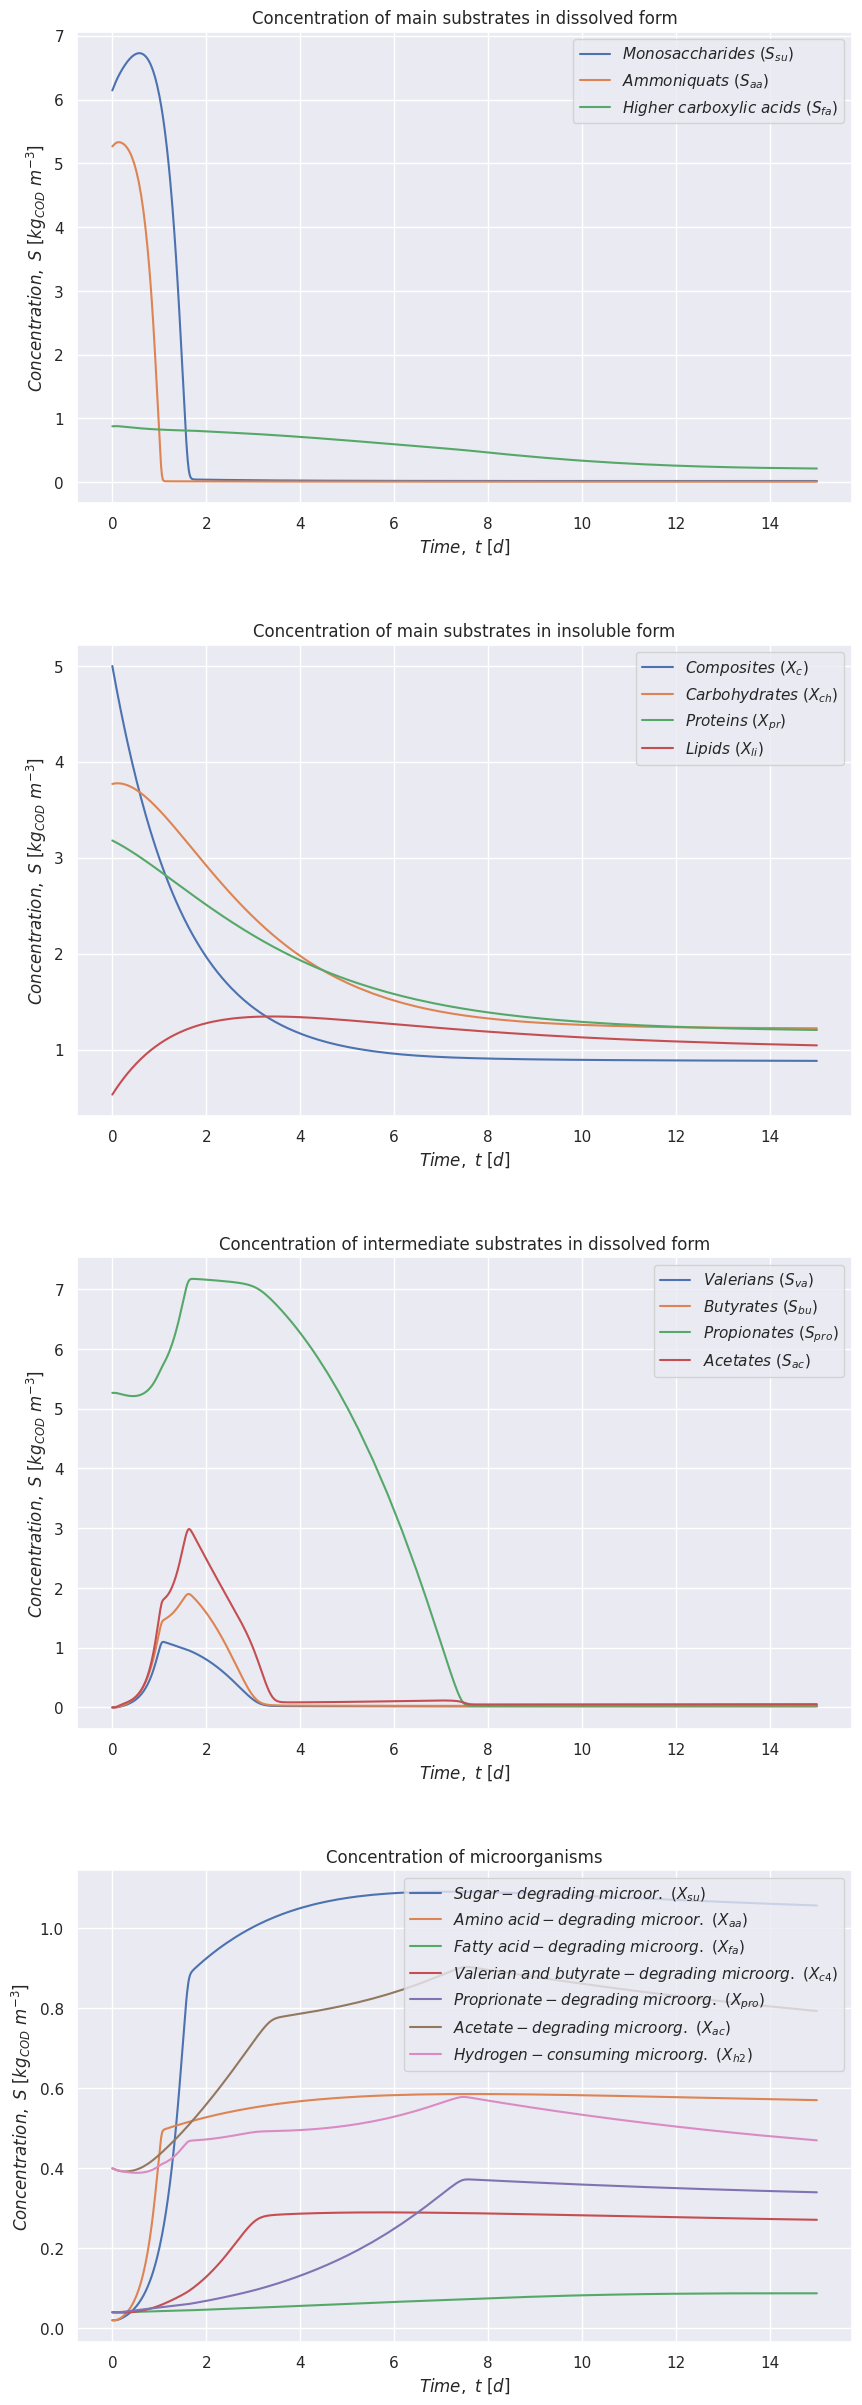

In [14]:
fig = plt.figure(figsize = (10, 30))

plt.subplot(411)
plt.plot(result.t, result.y[0,:], result.t, result.y[1,:], result.t, result.y[2,:])
plt.title('Concentration of main substrates in dissolved form')
plt.legend(['$Monosaccharides\ (S_{su})$',
            '$Ammoniquats\ (S_{aa})$',
            '$Higher\ carboxylic\ acids\ (S_{fa})$'],
             loc = 'upper right')
plt.xlabel('$Time,\ t\ [d]$')
plt.ylabel('$Concentration,\ S\ [kg_{COD}\ m^{-3}]$')

plt.subplot(412)
plt.plot(result.t, result.y[12,:], result.t, result.y[13,:], result.t, result.y[14,:],
         result.t, result.y[15,:])
plt.title('Concentration of main substrates in insoluble form')
plt.legend(['$Composites\ (X_{c})$',
            '$Carbohydrates\ (X_{ch})$',
            '$Proteins\ (X_{pr})$',
            '$Lipids\ (X_{li})$'],
             loc = 'upper right')
plt.xlabel('$Time,\ t\ [d]$')
plt.ylabel('$Concentration,\ S\ [kg_{COD}\ m^{-3}]$')

plt.subplot(413)
plt.plot(result.t, result.y[3,:], result.t, result.y[4,:], result.t, result.y[5,:],
         result.t, result.y[6,:])
plt.title('Concentration of intermediate substrates in dissolved form')
plt.legend(['$Valerians\ (S_{va})$',
            '$Butyrates\ (S_{bu})$',
            '$Propionates\ (S_{pro})$',
            '$Acetates\ (S_{ac})$'],
             loc = 'upper right')
plt.xlabel('$Time,\ t\ [d]$')
plt.ylabel('$Concentration,\ S\ [kg_{COD}\ m^{-3}]$')

plt.subplot(414)
plt.plot(result.t, result.y[16,:], result.t, result.y[17,:], result.t, result.y[18,:],
         result.t, result.y[19,:], result.t, result.y[20,:], result.t, result.y[21,:],
         result.t, result.y[22,:])
plt.title('Concentration of microorganisms')
plt.legend(['$Sugar-degrading\ microor.\ (X_{su})$',
            '$Amino\ acid-degrading\ microor.\ (X_{aa})$',
            '$Fatty\ acid-degrading\ microorg.\ (X_{fa})$',
            '$Valerian\ and\ butyrate-degrading\ microorg.\ (X_{c4})$',
            '$Proprionate-degrading\ microorg.\ (X_{pro})$',
            '$Acetate-degrading\ microorg.\ (X_{ac})$',
            '$Hydrogen-consuming\ microorg.\ (X_{h2})$'],
             loc = 'upper right')
plt.xlabel('$Time,\ t\ [d]$')
plt.ylabel('$Concentration,\ S\ [kg_{COD}\ m^{-3}]$')

plt.subplots_adjust(hspace = 0.3)
plt.show()

**Visualization of calculation results - part 2** // Visualization of indirect results (after additional calculations based on direct results) e.g. gas volume flow

In [15]:
# Determination of partial pressures and flux values
P_gas_h2  = result.y[24,:]*RT/16.0
P_gas_ch4 = result.y[25,:]*RT/64.0
P_gas_co2 = result.y[26,:]*RT

rhoT7 =  klaH2*(result.y[7,:]-16.0*KH_H2*P_gas_h2)
rhoT8 =  klaCH4*(result.y[8,:]-64.0*KH_CH4*P_gas_ch4)
rhoT9 =  klaCO2*(result.y[9,:]-KH_CO2*P_gas_co2)

q_gas_h2 = RT*Vl*(Ptot-Ph2o)**(-1)*(rhoT7/16)
q_gas_ch4 = RT*Vl*(Ptot-Ph2o)**(-1)*(rhoT8/64)
q_gas_co2 = RT*Vl*(Ptot-Ph2o)**(-1)*(rhoT9)
q_gas = q_gas_h2 + q_gas_ch4 + q_gas_co2

In [16]:
rhoT7 = [0 if x < 0 else x for x in rhoT7]
rhoT8 = [0 if x < 0 else x for x in rhoT8]
rhoT9 = [0 if x < 0 else x for x in rhoT9]

q_gas_h2 = [0 if x < 0 else x for x in q_gas_h2]
q_gas_ch4 = [0 if x < 0 else x for x in q_gas_ch4]
q_gas_co2 = [0 if x < 0 else x for x in q_gas_co2]

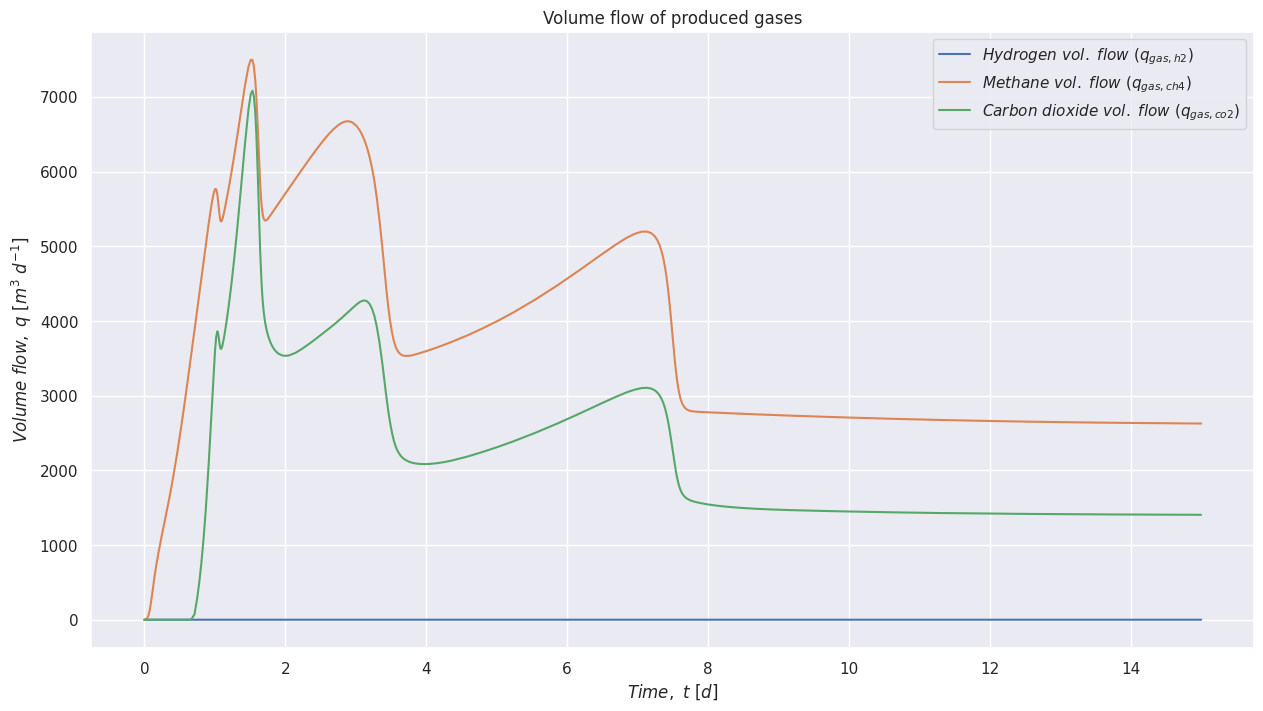

In [20]:
fig = plt.figure(figsize = (15, 8))

plt.plot(result.t, q_gas_h2, result.t, q_gas_ch4, result.t, q_gas_co2)
plt.title('Volume flow of produced gases')
plt.legend(['$Hydrogen\ vol.\ flow\ (q_{gas, h2})$',
            '$Methane\ vol.\ flow\ (q_{gas, ch4})$',
            '$Carbon\ dioxide\ vol.\ flow\ (q_{gas, co2})$'],
             loc = 'upper right')
plt.xlabel('$Time,\ t\ [d]$')
plt.ylabel('$Volume\ flow,\ q\ [m^{3}\ d^{-1}]$')
plt.show()

In [21]:
# Determination of the volume of gases produced (total after a whole period)
V_h2 = np.trapz(q_gas_h2, result.t)
V_ch4 = np.trapz(q_gas_ch4, result.t)
V_co2 = np.trapz(q_gas_co2, result.t)
V_tot = V_h2 + V_ch4 + V_co2

In [29]:
tab1 = pd.DataFrame({'Tot. vol. of hydrogen produced (V_h2)': V_h2,
                     'Tot. vol. of methane produced (V_ch4)': V_ch4,
                     'Tot. vol. of carbon dioxide produced (V_co2)': V_co2},
                      index = [0])

tab1.round(3).style.hide(axis="index")

Tot. vol. of hydrogen produced (V_h2),Tot. vol. of methane produced (V_ch4),Tot. vol. of carbon dioxide produced (V_co2)
2.483000,55270.587000,31897.229000


In [30]:
tab2 = pd.DataFrame({'Vol. fraction of hydrogen produced [%]': V_h2*100/V_tot,
                     'Vol. fraction of methane produced [%]': V_ch4*100/V_tot,
                     'Vol. fraction of carbon dioxide produced [%]': V_co2*100/V_tot},
                      index = [0])
tab2.round(3).style.hide(axis="index")

Vol. fraction of hydrogen produced [%],Vol. fraction of methane produced [%],Vol. fraction of carbon dioxide produced [%]
0.003000,63.405000,36.592000
